In [2]:
import csv
import numpy as np

def load_dataset(filename):
    '''Loads an example of market basket transactions from a provided csv file.

    Returns: A list (database) of lists (transactions). Each element of a transaction is 
    an item.
    '''

    with open(filename,'r') as dest_f:
        data_iter = csv.reader(dest_f, delimiter = ',', quotechar = '"')
        data = [data for data in data_iter]
        data_array = np.asarray(data)
        
    return data_array

In [3]:
dataset = load_dataset('results.csv')

In [4]:
dataset[:-5]

array([['date', 'home_team', 'away_team', ..., 'city', 'country',
        'neutral'],
       ['1872-11-30', 'Scotland', 'England', ..., 'Glasgow', 'Scotland',
        'FALSE'],
       ['1873-03-08', 'England', 'Scotland', ..., 'London', 'England',
        'FALSE'],
       ...,
       ['2020-09-08', 'Denmark', 'England', ..., 'Copenhagen', 'Denmark',
        'FALSE'],
       ['2020-09-08', 'France', 'Croatia', ..., 'Paris', 'France',
        'FALSE'],
       ['2020-09-08', 'Sweden', 'Portugal', ..., 'Stockholm', 'Sweden',
        'FALSE']], dtype='<U42')

In [5]:
import pandas as pd
import os

In [6]:
pwd

'/Users/xintongliu'

In [8]:

data = pd.read_csv(r"/Users/xintongliu/Desktop/results.csv")

In [9]:
data.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
41635,2020-09-08,Luxembourg,Montenegro,0,1,UEFA Nations League,Luxembourg City,Luxembourg,False
41636,2020-09-08,Cyprus,Azerbaijan,0,1,UEFA Nations League,Nicosia,Cyprus,False
41637,2020-09-08,Armenia,Estonia,2,0,UEFA Nations League,Yerevan,Armenia,False
41638,2020-09-08,Georgia,North Macedonia,1,1,UEFA Nations League,Tbilisi,Georgia,False
41639,2020-09-08,San Marino,Liechtenstein,0,2,UEFA Nations League,Rimini,Italy,True


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go 



In [13]:
def result(row):
      
    if row['home_score'] > row['away_score']:
        return row['home_team']
    elif row['home_score'] < row['away_score']:
        return row['away_team']
    else:
        return('Tie')
    

In [14]:
data['results'] = data[['home_score','away_score','home_team','away_team']].apply(result,axis=1)
data.head(2)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,results
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,Tie
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England


In [15]:
def home_wins(row):
        
        if row['home_team'] == row['results']:
            return("Home")
        elif row['home_team'] != row['results'] and row['results'] == 'Tie':
            return("Tie")
        else:
            return("Away")

In [16]:
data['home_win'] = pd.DataFrame(data[['home_team','results']].apply(home_wins,axis=1))
data.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,results,home_win
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,Tie,Tie
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England,Home
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland,Home
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,Tie,Tie
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland,Home


In [30]:
def make_stats_df(df):
    my_columns =  ['Home wins', 'Away wins', 'Total home games', 
                   'Total away games', 'Home win rate', 'Away win rate']
    data_df = pd.DataFrame(0, index = df['home_team'].append(df['away_team']).unique(), columns = my_columns)
    for i in range(len(df)):
        data_df.loc[df.iloc[i]['home_team']]['Total home games'] += 1
        data_df.loc[df.iloc[i]['away_team']]['Total away games'] += 1
        if df.iloc[i]['home_win'] == 'Home':
            data_df.loc[df.iloc[i]['home_team']]['Home wins'] += 1
        
        elif df.iloc[i]['home_win'] == 'Away':
            data_df.loc[df.iloc[i]['away_team']]['Away wins'] += 1
    data_df['Home win rate'] = data_df['Home wins']/data_df['Total home games']
    data_df['Away win rate'] = data_df['Away wins']/data_df['Total away games']
            
    return data_df

In [33]:
data_df = make_stats_df(data)
data_df.sort_values(by=["Home win rate"], ascending=False)

,Home wins,Away wins,Total home games,Total away games,Home win rate,Away win rate
Cascadia,2,2,2,5,1.000000,0.400000
Chameria,1,1,1,4,1.000000,0.250000
Parishes of Jersey,2,0,2,1,1.000000,0.000000
Central Spain,1,0,1,1,1.000000,0.000000
Yorkshire,4,1,5,2,0.800000,0.500000
Jersey,38,17,48,34,0.791667,0.500000
Monaco,3,2,4,8,0.750000,0.250000
Canary Islands,3,0,4,0,0.750000,NaN
Menorca,8,2,11,10,0.727273,0.200000
Rhodes,8,3,11,7,0.727273,0.428571


In [35]:
data_df.head()

,Home wins,Away wins,Total home games,Total away games,Home win rate,Away win rate
Scotland,215,157,381,402,0.564304,0.390547
England,308,265,498,513,0.618474,0.516569
Wales,124,86,322,336,0.385093,0.255952
Northern Ireland,106,59,313,333,0.338658,0.177177
United States,220,74,418,266,0.526316,0.278195


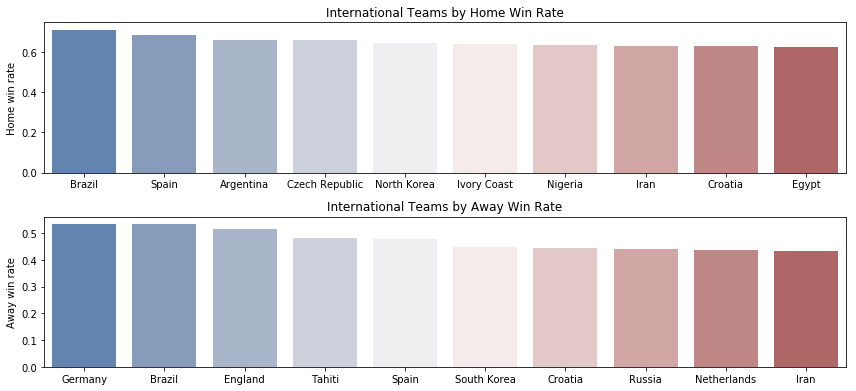

In [38]:
plt.figure(figsize = (12,8))
plt.subplot(311)
plt.title('International Teams by Home Win Rate')
sns.barplot(x = data_df[data_df['Total home games'] >= 100].sort_values('Home win rate', ascending = False).head(10).index, y = data_df[data_df['Total home games'] >= 50].sort_values('Home win rate', ascending = False).head(10)['Home win rate'], palette="vlag")
plt.subplot(312)
plt.title('International Teams by Away Win Rate')
sns.barplot(x = data_df[data_df['Total away games'] >= 100].sort_values('Away win rate', ascending = False).head(10).index, y = data_df[data_df['Total away games'] >= 50].sort_values('Away win rate', ascending = False).head(10)['Away win rate'], palette="vlag")

plt.tight_layout()